# <center><font color="blue" >  Weather Analysis</font> </center>

<img src="https://images.unsplash.com/photo-1531039929930-7d5632bbeefd?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=500&q=60" width=1000px height=200px > 

## Objective: Write a program that interacts with the weather database. Find the different insights that give proper visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path="/home/tejas/SEM_7/LAB/DA/DA/3_weather/weather.csv"
df=pd.read_csv(path)

In [4]:
df.head(2)

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,ZIP,City
0,09-01-2015,75,67,58,58,56,54,84,67,49,...,6.0,22,9,26.0,0,2,NaN,245,94107,San Francisco
1,09-02-2015,73,68,62,59,56,54,78,68,57,...,10.0,23,12,26.0,0,5,NaN,249,94107,San Francisco


In [5]:
#df[['PDT','Max TemperatureF']]
# old_names=['PDT','Max TemperatureF','Mean TemperatureF','Min TemperatureF','Max Dew PointF','MeanDew PointF','Min DewpointF','Max Humidity','Mean Humidity','Min Humidity',' Max Sea Level PressureIn',' Mean Sea Level PressureIn','Min Sea Level PressureIn','Max VisibilityMiles',' Mean VisibilityMiles',' Min VisibilityMiles' , ' Max Wind SpeedMPH',' Mean Wind SpeedMPH',' Max Gust SpeedMPH','PrecipitationIn',' CloudCover',' Events',' WindDirDegrees','ZIP','City']

old_names = ['Max TemperatureF', 'Min TemperatureF', 'Mean TemperatureF', 'Max Dew PointF', 'MeanDew PointF',
             'Min DewpointF', 'Max Humidity',
             ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn',
             ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles',
             ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn',
             ' CloudCover', ' WindDirDegrees', ' Events']


new_names = ['maxTemp', 'minTemp', 'meanTemp', 'maxDew', 'meanDew', 'minDew', 'maxHum', 'meanHum', 'minHum', 'maxPress',
             'minPress', 'meanPress', 'maxVis', 'meanVis',
             'minVis', 'maxWind', 'meanWind', 'maxGust', 'preIn', 'cloud', 'WindDir', 'events']


In [6]:
df.rename(columns=dict(zip(old_names,new_names)),inplace=True)

### Delete unused column in CSV File

In [7]:
df['preIn'] #ite empty 

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      T
13      T
14      0
15      T
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      T
       ..
1800    0
1801    0
1802    0
1803    0
1804    0
1805    0
1806    0
1807    0
1808    T
1809    0
1810    0
1811    0
1812    0
1813    0
1814    0
1815    0
1816    0
1817    0
1818    0
1819    0
1820    0
1821    0
1822    0
1823    0
1824    0
1825    0
1826    0
1827    0
1828    0
1829    0
Name: preIn, Length: 1830, dtype: object

In [8]:
del df['preIn']

In [9]:
# Remove the bad samples in temperature
#df = df[ (df['maxTemp'] <= 110) & (df['minTemp'] >= 25) ]

In [10]:
# List unique values on example column using drop_duplicates(We can also use unique())
df2 = pd.DataFrame(df, columns=['ZIP'])

m = df2.drop_duplicates(['ZIP'])


In [11]:
df['ZIP'].unique() # tells unique values

array([94107, 94063, 94301, 94041, 95113])

In [12]:
zipcodes = [94107, 94063, 94301, 94041, 95113]

In [13]:

# Day of months: start September, end August
x = [30, 61, 91, 122, 153, 182, 213, 243, 274, 304, 335, 366]
labels = ['September','October','November','December','January','February','March','April','May','June','July','August']


In [14]:
def maximum():
    i=0
    maxi=0
    for row in range(0,len(df.index)):
        if df.loc[i,'maxTemp']>maxi:
            maxi=df.loc[i,'maxTemp']
            max_index=1
        i=i+1
    return max_index
        

### Plots of Mean temperature in Fahrenheit scale


/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


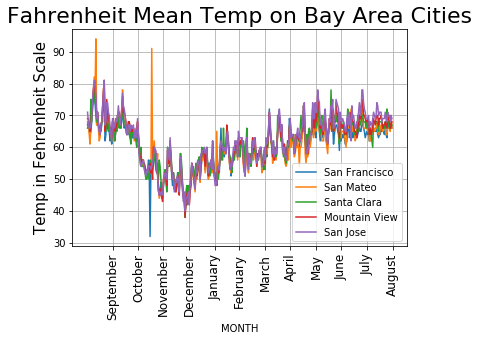

In [15]:
plt.figure()
for zcode in zipcodes:
    local=df.loc[df['ZIP']==zcode]
    dfn=pd.DataFrame(local,columns=['meanTemp'])
    plt.plot(dfn.as_matrix(),'-',label=str(zcode))
    
plt.xticks(x,labels,rotation='vertical',fontsize=12)
plt.grid(True)
plt.xlabel('MONTH')
plt.ylabel('Temp in Fehrenheit Scale',fontsize=15)
plt.title('Fahrenheit Mean Temp on Bay Area Cities',fontsize=22)
plt.legend(["San Francisco", "San Mateo","Santa Clara", "Mountain View","San Jose"])
plt.show()

### Plot compare Mean Wind and Max Gust

/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


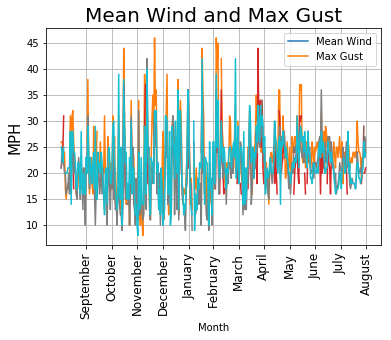

In [16]:
plt.figure()
for zcode in zipcodes:
    mn = df.loc[df['ZIP'] == zcode]
    df3 = pd.DataFrame(mn, columns=['meanWin', 'maxGust'])
    plt.plot(df3.as_matrix(),'-', label=str(zcode))
    
plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('MPH', fontsize=15)
plt.title('Mean Wind and Max Gust', fontsize=20)
plt.legend(["Mean Wind","Max Gust"])
plt.show()


### Plot mean temperature with mean humidity for San Francisco

/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


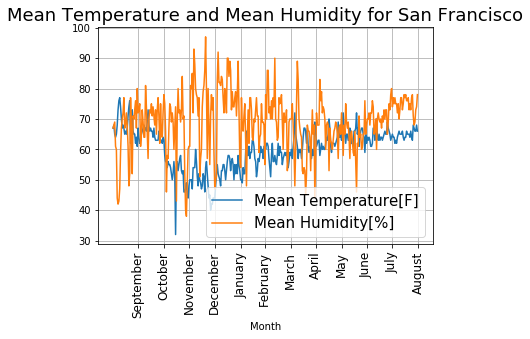

In [17]:
sf = df.loc[df['ZIP'] == 94107]
plt.figure()
df4 = pd.DataFrame(sf, columns=['meanTemp','meanHum'])
plt.plot(df4.as_matrix(), '-')

plt.grid(True)
plt.autoscale()
plt.xlabel('Month')
plt.ylabel('', fontsize=15)
plt.title('Mean Temperature and Mean Humidity for San Francisco',fontsize=18)

plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.legend(["Mean Temperature[F]", "Mean Humidity[%]"], fontsize=15)
plt.show()


### replace '' string with blank values to zero in CSV file

In [18]:
df.fillna(0, inplace=True)

### Histogram of Mean Temperature in All cities in Bay Area

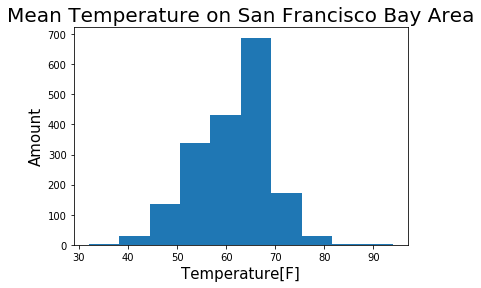

In [19]:

plt.title('Mean Temperature on San Francisco Bay Area', fontsize=20)
plt.xlabel('Temperature[F]',fontsize=15)
plt.ylabel('Amount',fontsize=15)

plot_hist=plt.hist(df['meanTemp'],bins=10)
plt.show()

### Plot Area compare Cloud Level and Event such as rain, rain-thunderstorm, fog or fog-rain example for San Francisco

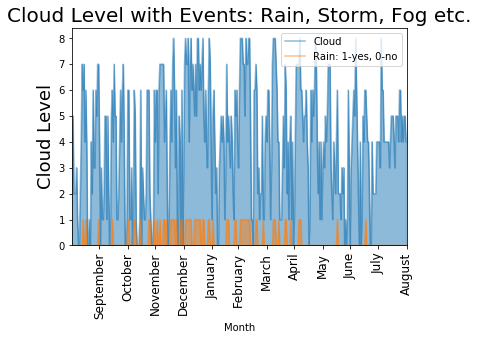

In [20]:
df.replace(['Rain','Rain-Thunderstorm','Fog','Fog-Rain'],[1,1,0,1],inplace=True)
sf = df.loc[df['ZIP'] == 94107]
df7 = pd.DataFrame(sf, columns=['cloud','events'])

df7.plot.area(stacked=False)

plt.xlabel('Month')
plt.ylabel('Cloud Level', fontsize=18)
plt.title('Cloud Level with Events: Rain, Storm, Fog etc.',fontsize=20)

plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.legend(["Cloud","Rain: 1-yes, 0-no"])
plt.show()

### Plot of min, max and mean pressure for San Francisco

/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


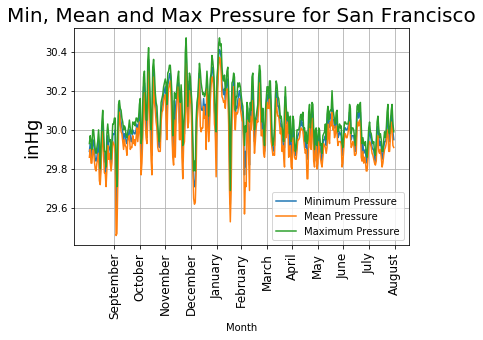

In [21]:
sf = df.loc[df['ZIP'] == 94107]
plt.figure()

df8 = pd.DataFrame(sf, columns=['minPress','meanPress','maxPress'])

plt.plot(df8.as_matrix(), '-')

plt.grid(True)
plt.autoscale()
plt.xlabel('Month')
plt.ylabel('inHg', fontsize=18)
plt.title('Min, Mean and Max Pressure for San Francisco',fontsize=20)

plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.legend(["Minimum Pressure", "Mean Pressure","Maximum Pressure"])
plt.show()

### Printing the date and place for the maximum temperature recorded

In [22]:
print("Details of maximum Temperature Recorded:")
max_index = maximum()
print(max_index)
print(df.loc[max_index, ['PDT','ZIP', 'City', 'maxTemp']])
#print(data.loc[data['maxTemp']== data['maxTemp'].max(), ['PDT','ZIP', 'City']])

Details of maximum Temperature Recorded:
1
PDT           09-02-2015
ZIP                94107
City       San Francisco
maxTemp               73
Name: 1, dtype: object


__Visit <i><a href="https://www.github.com/tejas-2232">Github </a></i> to explore more exciting content__ 
<br>
__Connect on <i><a href=""> LinkedIn</a> </i>for prefessional dialogue__